In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
df = pd.read_csv("ProcessedWeatherData_v5.csv")
df_test = pd.read_csv("ProcessedWeatherDataTest_v5.csv")
frames = [df, df_test]
df_data = pd.concat(frames)

In [4]:
df_data = df_data.drop(["station_id"], axis = 1)
df_data = df_data.drop(["WaveHeight","WavePeriod"], axis =1)
df_data = df_data.dropna()

In [5]:
df_data.head()

,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
0,1011.4,270.0,18.0,25.0,16.2,13.9,16.1,86.0
1,1023.3,190.0,11.0,14.0,13.9,11.0,14.9,83.0
2,1033.2,200.0,19.0,23.0,7.7,4.0,10.2,77.0
3,1012.5,300.0,13.0,20.0,14.7,14.0,15.6,96.0
4,1011.0,190.0,13.0,18.0,13.6,10.7,13.9,83.0


In [6]:
X = df_data.iloc[:,:-1]
y = df_data.iloc[:,-1]

In [7]:
X.isnull().sum()

AtmosphericPressure    0
WindDirection          0
WindSpeed              0
Gust                   0
AirTemperature         0
DewPoint               0
SeaTemperature         0
dtype: int64

# Forward Selection

In [22]:
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [23]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=7,
                          scoring='r2')

In [24]:
sfs.k_feature_names_

('AtmosphericPressure',
 'WindDirection',
 'WindSpeed',
 'Gust',
 'AirTemperature',
 'DewPoint',
 'SeaTemperature')

# Backward selection

In [13]:
sfsb = SFS(LinearRegression(),
          k_features=7,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [14]:
sfsb.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=7, scoring='r2')

In [15]:
sfsb.k_feature_names_

('AtmosphericPressure',
 'WindDirection',
 'WindSpeed',
 'Gust',
 'AirTemperature',
 'DewPoint',
 'SeaTemperature')

# Plot

In [17]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,7),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(3, 7))

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


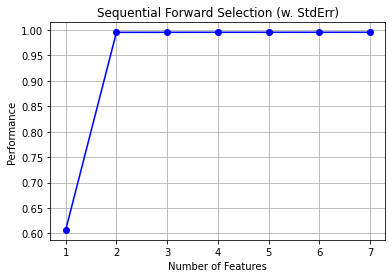

In [18]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [20]:
sfs2 = SFS(LinearRegression(),
         k_features=(3,7),
         forward=False,
         floating=False,
         cv=0)
sfs2.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(3, 7))

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


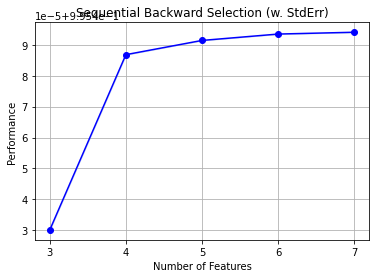

In [21]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()